<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Basic-usage-of-LightGraphs.jl" data-toc-modified-id="Basic-usage-of-LightGraphs.jl-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Basic usage of LightGraphs.jl</a></span></li><li><span><a href="#exact-GMFPT" data-toc-modified-id="exact-GMFPT-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exact GMFPT</a></span></li><li><span><a href="#Steady-state-for-random-walk" data-toc-modified-id="Steady-state-for-random-walk-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Steady state for random walk</a></span><ul class="toc-item"><li><span><a href="#Transition-matrix" data-toc-modified-id="Transition-matrix-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Transition matrix</a></span></li><li><span><a href="#bipartite-graph" data-toc-modified-id="bipartite-graph-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>bipartite graph</a></span></li></ul></li><li><span><a href="#Random-walk" data-toc-modified-id="Random-walk-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Random walk</a></span><ul class="toc-item"><li><span><a href="#First-passage-time" data-toc-modified-id="First-passage-time-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>First passage time</a></span><ul class="toc-item"><li><span><a href="#distribution-of-FPT" data-toc-modified-id="distribution-of-FPT-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>distribution of FPT</a></span></li></ul></li><li><span><a href="#Cover-time" data-toc-modified-id="Cover-time-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Cover time</a></span><ul class="toc-item"><li><span><a href="#define-function" data-toc-modified-id="define-function-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>define function</a></span></li></ul></li><li><span><a href="#Mean-cover-time" data-toc-modified-id="Mean-cover-time-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Mean cover time</a></span><ul class="toc-item"><li><span><a href="#Random-graph" data-toc-modified-id="Random-graph-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Random graph</a></span></li><li><span><a href="#Complete-graph" data-toc-modified-id="Complete-graph-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Complete graph</a></span></li><li><span><a href="#Erdős–Rény" data-toc-modified-id="Erdős–Rény-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Erdős–Rény</a></span></li><li><span><a href="#Barabási–Albert-model" data-toc-modified-id="Barabási–Albert-model-4.3.4"><span class="toc-item-num">4.3.4&nbsp;&nbsp;</span>Barabási–Albert model</a></span></li><li><span><a href="#k---regular-graph" data-toc-modified-id="k---regular-graph-4.3.5"><span class="toc-item-num">4.3.5&nbsp;&nbsp;</span>k - regular graph</a></span></li><li><span><a href="#Watts–Strogatz-model" data-toc-modified-id="Watts–Strogatz-model-4.3.6"><span class="toc-item-num">4.3.6&nbsp;&nbsp;</span>Watts–Strogatz model</a></span></li></ul></li><li><span><a href="#Animation" data-toc-modified-id="Animation-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Animation</a></span><ul class="toc-item"><li><span><a href="#First-passage-time" data-toc-modified-id="First-passage-time-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>First passage time</a></span></li><li><span><a href="#Cover-time" data-toc-modified-id="Cover-time-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Cover time</a></span></li></ul></li></ul></li></ul></div>

http://nbviewer.jupyter.org/github/JuliaGraphs/JuliaGraphsTutorials/blob/master/Basics.ipynb

In [1]:
# Pkg.add("LightGraphs")
# Pkg.add("GraphPlot")
# Pkg.add("QuadGK")
# Pkg.add("ProgressMeter")

In [2]:
using LightGraphs, GraphPlot, QuadGK, ProgressMeter

In [3]:
ggplot(G; arg...) = begin srand(1); gplot(G; layout=circular_layout, nodelabel=1:nv(G), arg...); end

ggplot (generic function with 1 method)

In [4]:
function Base.show(io::IO, ::MIME"text/latex", x::AbstractArray{T}) where T <: Number
    function toeqnarray(x::Vector{T})
        a = join([string(x[i]) for i in 1:length(x)], "\\\\")
        "\\begin{bmatrix}$a\\end{bmatrix}"
    end
    function toeqnarray(x::AbstractArray{T,2})
        sz = size(x)
        a = join([join(map(string, x[i,:]), "&") for i in 1:sz[1]], "\\\\")
        "\\begin{bmatrix}$a\\end{bmatrix}"
    end
    print(io, toeqnarray(x))
end

# Basic usage of LightGraphs.jl

In [5]:
nnodes, nedges = 10, 20
G = Graph(nnodes, nedges)

{10, 20} undirected simple Int64 graph

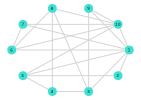

In [6]:
ggplot(G)

In [7]:
# save figure
using Compose
draw(PNG("sample.png", 8inch, 8inch), gplot(G, nodelabel=1:nv(G), layout=circular_layout))

In [8]:
# random walk, niter iteration
startnode, niter = 1, 10
randomwalk(G, startnode, niter)

10-element Array{Int64,1}:
  1
  9
  3
  8
 10
  8
  3
  1
  9
  3

In [9]:
# submodule of LightGraphs in order to compute spectral of adjacency matrix, graph laplacian
using LightGraphs.LinAlg

In [10]:
A = adjacency_matrix(G)

10×10 SparseMatrixCSC{Int64,Int64} with 40 stored entries:
  [2 ,  1]  =  1
  [3 ,  1]  =  1
  [5 ,  1]  =  1
  [6 ,  1]  =  1
  [7 ,  1]  =  1
  [9 ,  1]  =  1
  [10,  1]  =  1
  [1 ,  2]  =  1
  [5 ,  2]  =  1
  [1 ,  3]  =  1
  ⋮
  [6 ,  8]  =  1
  [10,  8]  =  1
  [1 ,  9]  =  1
  [3 ,  9]  =  1
  [10,  9]  =  1
  [1 , 10]  =  1
  [5 , 10]  =  1
  [6 , 10]  =  1
  [7 , 10]  =  1
  [8 , 10]  =  1
  [9 , 10]  =  1

In [11]:
full(A)

10×10 Array{Int64,2}:
 0  1  1  0  1  1  1  0  1  1
 1  0  0  0  1  0  0  0  0  0
 1  0  0  1  0  0  0  1  1  0
 0  0  1  0  1  0  0  1  0  0
 1  1  0  1  0  0  0  0  0  1
 1  0  0  0  0  0  1  1  0  1
 1  0  0  0  0  1  0  0  0  1
 0  0  1  1  0  1  0  0  0  1
 1  0  1  0  0  0  0  0  0  1
 1  0  0  0  1  1  1  1  1  0

In [12]:
n = 2
initial = ones(nv(G))
(A^n * initial) ./ norm(A^n * initial)

10-element Array{Float64,1}:
 0.44291 
 0.187385
 0.289595
 0.20442 
 0.30663 
 0.3407  
 0.289595
 0.289595
 0.289595
 0.425875

In [13]:
n = 10
initial = ones(nv(G))
(A^n * initial) ./ norm(A^n * initial)

10-element Array{Float64,1}:
 0.472985
 0.173972
 0.278357
 0.194386
 0.292016
 0.337737
 0.284973
 0.284872
 0.271474
 0.441985

In [14]:
n = 10000
initial = vcat(1, zeros(nv(G)-1))
for i in 1:n
    initial = initial ./ norm(initial)
    initial = A * initial
end
initial  ./ norm(initial)

10-element Array{Float64,1}:
 0.473089
 0.173972
 0.278312
 0.194455
 0.291907
 0.337694
 0.284918
 0.284845
 0.271414
 0.442066

In [15]:
@show eigvals(full(A))
for i in 1:10
    println(eigvecs(full(A))[:,i])
end

eigvals(full(A)) = [-2.43623, -2.27977, -1.58009, -1.27486, -0.456361, -0.173082, 0.813921, 1.35081, 1.63843, 4.39723]
[-0.0339472, 0.177029, 0.22268, 0.260425, -0.397337, 0.0725769, -0.247566, -0.4598, -0.309179, 0.564499]
[0.646135, -0.13457, -0.450067, 0.247935, -0.339347, -0.323078, -0.147905, 0.22418, -0.0922023, 0.0141316]
[0.234793, -0.297314, 0.397877, -0.485493, 0.234989, -0.30123, -0.0697892, 0.134256, -0.512237, 0.17671]
[-0.280431, 0.408022, 0.022041, -0.0557177, -0.23974, -0.568178, 0.482286, 0.288732, 0.0193182, 0.233762]
[0.0540973, -0.43905, 0.0931556, 0.425151, 0.146268, -0.21355, 0.583753, -0.433445, -0.0883153, -0.106949]
[-0.282396, -0.367129, -0.343179, 0.0207421, 0.345939, -0.245371, -0.237692, -0.0063505, 0.327402, 0.568907]
[-0.22619, 0.138467, -0.369891, 0.307219, 0.338891, 0.235092, 0.0801499, 0.281052, -0.663143, 0.0563339]
[0.236365, 0.559353, -0.0631065, 0.0472456, 0.519214, -0.372439, -0.205566, -0.392288, 0.0234326, -0.141605]
[-0.184581, -0.0762229, 0.49

# exact GMFPT

In [16]:
"v: node label number"
function exactGMFPT(g::AbstractGraph, v::Integer)
    N = nv(g)
    E = LightGraphs.ne(g)
    eigenvalues = laplacian_spectrum(g)
    eigenvectors = eigvecs(full(laplacian_matrix(g)))
    
    τ = N / (N-1) * begin tmp = 0.0
        for i in 2:N
            tmp += 1 / eigenvalues[i] * (2 * E * eigenvectors[v,i]^2 - eigenvectors[v,i] * degree(g)' * eigenvectors[:,i])
        end
        tmp
    end
end


function exactGMFPTlist(g::AbstractGraph)
    N = nv(g)
    E = LightGraphs.ne(g)
    eigenvalues = laplacian_spectrum(g)
    eigenvectors = eigvecs(full(laplacian_matrix(g)))
    exactgmfptlist = zeros(Float64, N)
    nodedegree = degree(g)
    
    for v in 1:N
        tmp = 0.0
        for i in 2:N
#             println(v, ", ", i)
            tmp += 1 / eigenvalues[i] * (2 * E * eigenvectors[v,i]^2 - eigenvectors[v,i] * nodedegree' * eigenvectors[:,i])
        end
        exactgmfptlist[v] = N / (N-1) * tmp
    end
    return exactgmfptlist
end

exactGMFPTlist (generic function with 1 method)

In [17]:
# approximation
g = Graph(10,20)
node = 1
mean(degree(g)) * nv(g) / degree(g, node) / (1 - (1 / mean( degree(g) ) ) )

26.666666666666668

In [18]:
exactGMFPT(g,node)

23.683012251280086

In [19]:
exactGMFPTlist(g)

10-element Array{Float64,1}:
 23.683  
  6.1457 
 10.6577 
  7.70018
 10.2526 
 10.6531 
 10.9811 
 10.7253 
 15.4012 
 10.0606 

# Steady state for random walk

## Transition matrix

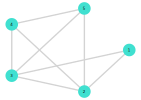

In [20]:
V, E = 5, 8
G =  Graph(V, E)
ggplot(G, nodelabel=1:nv(G))

In [21]:
"make transition matrix from graph"
function transtion_matrix(g::AbstractGraph)
    A = adjacency_matrix(g)
    D = vec(sum(A, 1))
    return dropzeros((A ./ D)')
end

transtion_matrix

In [22]:
transtion_matrix(G) |> full

5×5 Array{Float64,2}:
 0.0  0.25  0.25  0.0       0.0     
 0.5  0.0   0.25  0.333333  0.333333
 0.5  0.25  0.0   0.333333  0.333333
 0.0  0.25  0.25  0.0       0.333333
 0.0  0.25  0.25  0.333333  0.0     

In [23]:
eigvecs(transtion_matrix(G) |> full)

5×5 Array{Float64,2}:
  0.480114  -0.640243  0.272166  -8.88178e-17   8.32002e-32
 -0.541888  -0.189085  0.544331   0.707107     -4.71028e-16
 -0.541888  -0.189085  0.544331  -0.707107      4.71028e-16
  0.301832   0.509207  0.408248   8.88178e-17  -0.707107   
  0.301832   0.509207  0.408248  -1.33227e-16   0.707107   

In [24]:
n = 10
T = transtion_matrix(G)
state = [1,0,0,0,0]
T^n * state

5-element Array{Float64,1}:
 0.12617 
 0.24868 
 0.24868 
 0.188235
 0.188235

In [25]:
A = adjacency_matrix(G); D = vec(sum(A, 1));
D / (2E)

5-element Array{Float64,1}:
 0.125 
 0.25  
 0.25  
 0.1875
 0.1875

## bipartite graph

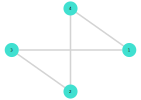

In [26]:
g = Graph(4)
add_edge!(g, 1, 3)
add_edge!(g, 1, 4)
add_edge!(g, 2, 3)
add_edge!(g, 2, 4)
ggplot(g)

In [27]:
adjacency_matrix(g) |> full

4×4 Array{Int64,2}:
 0  0  1  1
 0  0  1  1
 1  1  0  0
 1  1  0  0

In [28]:
P = adjacency_matrix(g) / 2 |> full

4×4 Array{Float64,2}:
 0.0  0.0  0.5  0.5
 0.0  0.0  0.5  0.5
 0.5  0.5  0.0  0.0
 0.5  0.5  0.0  0.0

In [29]:
@show eigvals(P)
eigvecs(P)

eigvals(P) = [-1.0, -1.57009e-16, 1.0886e-48, 1.0]


4×4 Array{Float64,2}:
 -0.5   0.707107     -8.32667e-16  0.5
 -0.5  -0.707107     -6.66134e-16  0.5
  0.5  -1.11022e-16  -0.707107     0.5
  0.5   0.0           0.707107     0.5

In [30]:
state = vcat(1, zeros(nv(g)-1))
P * state
# P^2 * state
# P^3 * state

4-element Array{Float64,1}:
 0.0
 0.0
 0.5
 0.5

# Random walk

## First passage time

In [31]:
"""
    fptvisit(g, s, f ;niter)
First passsage time

Perform a random walk on graph `g` starting at vertex `s` and finishing at vertex `f`.
niter is upper bound of the number of iterations to avoid infinite loop. Default is 10*nv(g)
Return a vector of vertices visited in order and total time step.
"""
function fptvisit(g::AG, s::Integer, f::Integer ;niter::Integer=10*nv(g)) where AG <: AbstractGraph{T} where T
    s in vertices(g) || throw(BoundsError())
    f in vertices(g) || throw(BoundsError())
    Bool(in.(s, connected_components(g))' * in.(f, connected_components(g)))|| error("Node $s and node $f are disconnected")
    visited = Vector{T}()
    sizehint!(visited, niter)
    currs = s
    i = 1
    while true
        push!(visited, currs)
        i += 1
        currs = rand(out_neighbors(g, currs))
        if currs == f
            push!(visited, currs)
            break
        end
    end
    return visited[1:i], i-1
end


"""
    fpt(g, s, f ;niter)
First passsage time

Perform a random walk on graph `g` starting at vertex `s` and finishing at vertex `f`.
niter is upper bound of the number of iterations to avoid infinite loop. Default is 10*nv(g)
Return total time step.
"""
function fpt(g::AG, s::Integer, f::Integer ;niter::Integer=10*nv(g)) where AG <: AbstractGraph{T} where T
    s in vertices(g) || throw(BoundsError())
    f in vertices(g) || throw(BoundsError())
    Bool(in.(s, connected_components(g))' * in.(f, connected_components(g)))|| error("Node $s and node $f are disconnected")
    currs = s
    i = 1
    while true
        i += 1
        currs = rand(out_neighbors(g, currs))
        currs == f && break
    end
    return i-1
end

fpt

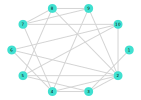

In [32]:
V, E = 10, 20
G =  Graph(V, E)
ggplot(G, nodelabel=1:V)

In [33]:
seed = 10
srand(seed);  @show @time fptvisit(G, 1, 1)

srand(seed); @show @time fpt(G, 1, 1)

  0.239093 seconds (98.45 k allocations: 4.743 MiB)
@time(fptvisit(G, 1, 1)) = ([1, 3, 1], 2)
  0.055025 seconds (20.19 k allocations: 845.279 KiB)
@time(fpt(G, 1, 1)) = 2


2

In [34]:
track = fptvisit(G, 1, 1)[1]

3-element Array{Int64,1}:
 1
 3
 1

### distribution of FPT

In [35]:
using Plots, StatsBase; pyplot()

Plots.PyPlotBackend()

In [36]:
srand(1)
nnodes = 100
g = CompleteGraph(nnodes)
node = 4
@show mean(degree(g))
@show degree(g, node)
nsample = 300
first_passage_time = zeros(Float64, nnodes-1, nsample)

idx = 1
@time for i in 1:nnodes
    if i == node
        continue
    end
    
    for j in 1:nsample
        first_passage_time[idx, j] = fpt(g, idx, node) # first passege time of 'node' to 'node'   
    end
    idx += 1
end
first_passage_time
mean(first_passage_time)

mean(degree(g)) = 99.0
degree(g, node) = 99
  1.335518 seconds (1.66 M allocations: 612.285 MiB, 5.16% gc time)


99.19329966329967

h = fit(Histogram, vec(first_passage_time), closed=:left) = StatsBase.Histogram{Int64,1,Tuple{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}}
edges:
  0.0:100.0:1000.0
weights: [18668, 7090, 2552, 874, 341, 115, 41, 12, 4, 3]
closed: left
isdensity: false



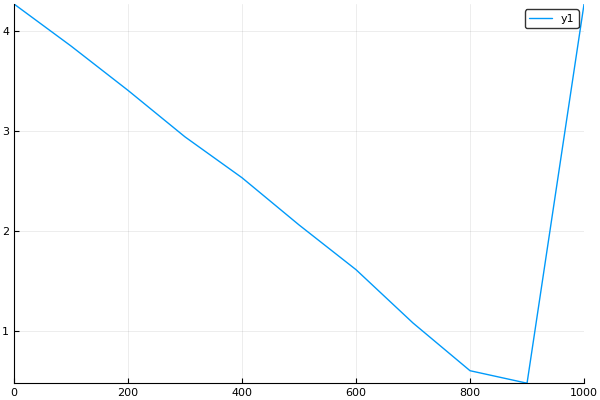

In [37]:
@show h = fit(Histogram, vec(first_passage_time), closed=:left)
plot(h.edges, log10.(h.weights))

In [38]:
a,b = linreg(h.edges[1][1:end-1], log10.(h.weights)[1:end])

(4.273908804300914, -0.00442318963217074)


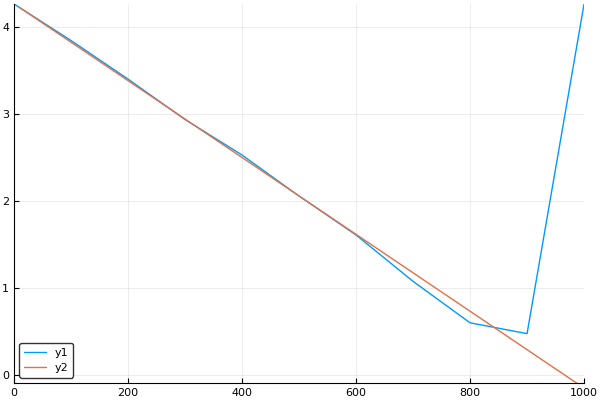

In [39]:
plot(h.edges, log10.(h.weights))
plot!(x-> a + b * x, 0, h.edges[1][end])

In [40]:
- 1 / b

226.0811955080561


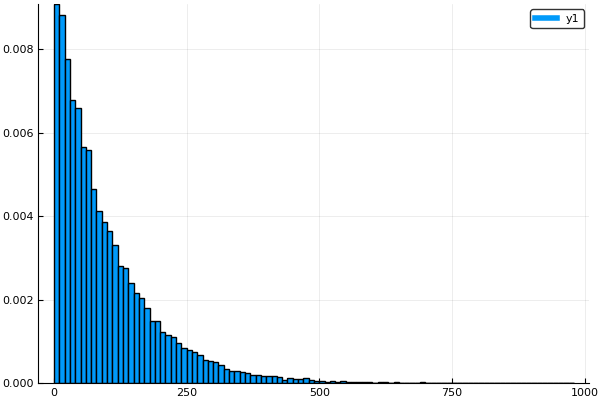

In [41]:
histogram(vec(first_passage_time), norm=true)


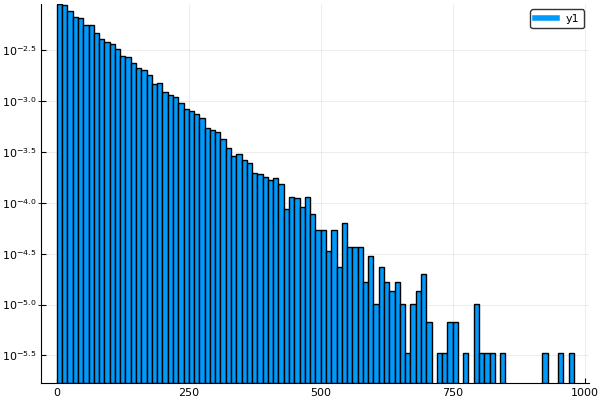

In [42]:
histogram(vec(first_passage_time), yscale=:log10, norm=true)

In [43]:
exactGMFPT(g, node)

99.00000000000011

## Cover time

### define function

In [44]:
"""
    ctvisit(g, s ;niter)
Cover time

Perform a random walk on graph `g` starting at vertex `s` and continuing for steps that covers all node. 
Return a vector of vertices visited in order and total time step.
"""
function ctvisit(g::AG, s::Integer ;niter::Integer=100_000) where AG <: AbstractGraph{T} where T
    s in vertices(g) || throw(BoundsError())
    (length(connected_components(g)[1]) == nv(g)) || error("The graph is disconnected.")
    visited = Vector{T}()
    sizehint!(visited, niter)
    currs = s
    i = 1
    while i <= niter
        push!(visited, currs)
        i += 1
        currs = rand(out_neighbors(g, currs))
        if length(Set(visited)) == nv(g); break; end
    end
    return visited[1:(i-1)], i-2
end

ctvisit

In [45]:
"""
    ct(g, s ;niter)
Cover time

Perform a random walk on graph `g` starting at vertex `s` and continuing for steps that covers all node. 
Return a vector of vertices visited in order and total time step.
"""
function ct(g::AG, s::Integer ;niter::Integer=100_000) where AG <: AbstractGraph{T} where T
    s in vertices(g) || throw(BoundsError())
    (length(connected_components(g)[1]) == nv(g)) || error("The graph is disconnected.")
    visited = Set{T}()
    sizehint!(visited, nv(g))
    currs = s
    i = 1
    while i <= niter
#         push!(visited, currs)
        visited = visited ∪ Set(currs)
        i += 1
        currs = rand(out_neighbors(g, currs))
        if length(visited) == nv(g); break; end
    end
    return i-2
end

ct

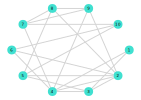

In [46]:
srand(1)
g = Graph(10, 20)
ggplot(g, nodelabel=1:nv(g))

In [47]:
# start node
seed = 3
srand(seed)
snode = 1
track = ctvisit(g, snode)[1]

40-element Array{Int64,1}:
  1
  3
  5
  2
  9
  8
  9
  2
  6
  2
  5
  2
  4
  ⋮
  1
  4
  1
  3
  5
  2
  8
  9
  2
  5
 10
  7

In [48]:
for i in 1:length(track)
    println(sort(collect(Set(track[1:i]))), ": ", length(Set(track[1:i])))
end

[1]: 1
[1, 3]: 2
[1, 3, 5]: 3
[1, 2, 3, 5]: 4
[1, 2, 3, 5, 9]: 5
[1, 2, 3, 5, 8, 9]: 6
[1, 2, 3, 5, 8, 9]: 6
[1, 2, 3, 5, 8, 9]: 6
[1, 2, 3, 5, 6, 8, 9]: 7
[1, 2, 3, 5, 6, 8, 9]: 7
[1, 2, 3, 5, 6, 8, 9]: 7
[1, 2, 3, 5, 6, 8, 9]: 7
[1, 2, 3, 4, 5, 6, 8, 9]: 8
[1, 2, 3, 4, 5, 6, 8, 9]: 8
[1, 2, 3, 4, 5, 6, 8, 9]: 8
[1, 2, 3, 4, 5, 6, 8, 9]: 8
[1, 2, 3, 4, 5, 6, 8, 9, 10]: 9
[1, 2, 3, 4, 5, 6, 8, 9, 10]: 9
[1, 2, 3, 4, 5, 6, 8, 9, 10]: 9
[1, 2, 3, 4, 5, 6, 8, 9, 10]: 9
[1, 2, 3, 4, 5, 6, 8, 9, 10]: 9
[1, 2, 3, 4, 5, 6, 8, 9, 10]: 9
[1, 2, 3, 4, 5, 6, 8, 9, 10]: 9
[1, 2, 3, 4, 5, 6, 8, 9, 10]: 9
[1, 2, 3, 4, 5, 6, 8, 9, 10]: 9
[1, 2, 3, 4, 5, 6, 8, 9, 10]: 9
[1, 2, 3, 4, 5, 6, 8, 9, 10]: 9
[1, 2, 3, 4, 5, 6, 8, 9, 10]: 9
[1, 2, 3, 4, 5, 6, 8, 9, 10]: 9
[1, 2, 3, 4, 5, 6, 8, 9, 10]: 9
[1, 2, 3, 4, 5, 6, 8, 9, 10]: 9
[1, 2, 3, 4, 5, 6, 8, 9, 10]: 9
[1, 2, 3, 4, 5, 6, 8, 9, 10]: 9
[1, 2, 3, 4, 5, 6, 8, 9, 10]: 9
[1, 2, 3, 4, 5, 6, 8, 9, 10]: 9
[1, 2, 3, 4, 5, 6, 8, 9, 10]: 9
[1, 2, 3, 4, 5, 6

## Mean cover time

In [49]:
# using exact GMFPT
Pexact(T, exact_gmfpt) = prod(1 - exp.(- T ./ exact_gmfpt))

# using estimated GMFPT
function Pest(T, degreelist)
    N = length(degreelist)
    meand = mean(degreelist)
    prod(1 - exp.(- T * degreelist * (1 - 1 / meand) / (N * meand)))
end

Pest (generic function with 1 method)

###  Random graph

<i style="font-size:0.8cm;">100 nodes</i>  

<i style="font-size:0.8cm;">500 edges</i>

<i style="font-size:0.8cm;">For each $T_u$, 100 samples</i>

In [50]:
nnodes = 100
nedges = 500
nsample = 100
g = Graph(nnodes, nedges)
# g = CompleteGraph(nnodes)
meancovertime = zeros(Float64, nnodes, nsample)
@showprogress 1 "Computing..." for i in 1:nnodes
    for j in 1:nsample
        meancovertime[i, j] = ct(g, i)
    end
end
simulation_result = mean(meancovertime)

Computing...100%|███████████████████████████████████████| Time: 0:00:37


761.1332

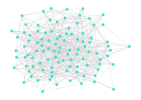

In [51]:
# gplot(g, layout=random_layout)
# gplot(g,layout=circular_layout)
gplot(g)

In [52]:
exact_gmfpt = exactGMFPTlist(g);
@time begin 
    i = 1
    while !(1 - Pexact(i, exact_gmfpt) < 1e-10)
        i += 1
    end
    Tₘₐₓ = i
    @show Tₘₐₓ, 1 - Pexact(i, exact_gmfpt)
end

println()
@time begin
    exact_gmfpt = exactGMFPTlist(g);
    exact = quadgk(x-> 1 - Pexact(x, exact_gmfpt), 0, i)[1]
    print("thesis exact: ")
end
println()

@time begin
    degreelist = degree(g)
    estimation = quadgk(x-> 1 - Pest(x, degreelist), 0, i)[1]
    print("thesis estimate: ")
end


sleep(0.1)
display(MIME("text/markdown"), 
"""
\$\$
    \\tau^{\\text{ex}}_v = \\frac{N}{N-1} \\sum_{i=2}^{N} \\frac{1}{\\lambda_i} 
        \\left(2E \\mu_{iv}^2 - \\mu_{iv}\\sum_{n=1}^N k_n \\mu_{in}  \\right), ~~~
    \\tau^{\\text{es}}_v \\geq \\frac{N \\langle k \\rangle}{k_v} \\frac{1}{1 - \\langle k \\rangle^{-1}}
\$\$
    
    
\$\$
    \\langle T^{\\text{ex}} \\rangle \\simeq \\int_{0}^{\\infty} dT 
    \\left\\{1 - \\prod_{v=1}^{N} \\left\[1 - \\exp \\left\(- \\frac{T}{\\tau_v^{\\text{ex}}} \\right\) \\right\]  
\\right\\} 
\$\$

\$\$
    \\langle T^{\\text{es}} \\rangle \\geq \\int_{0}^{\\infty} dT 
    \\left\\{1 - \\prod_{v=1}^{N} 
        \\left\[1 - 
            \\exp \\left\(- Tk_v \\frac{1 - \\langle k \\rangle^{-1}}{N \\langle k \\rangle} \\right\) 
        \\right\]  
    \\right\\} 
\$\$    


|       type      |                        value                       |                                            error (%)                                       |
|:---------------:|:--------------------------------------------------:|:------------------------------------------------------------------------------------------:|
|   Thesis exact  | $(exact)                                           | $(100 * abs(exact - simulation_result)/exact)                                              |
| Thesis estimate | $(estimation)                                      | $(100 * abs(estimation - simulation_result)/estimation)                                    |
|  My simulation  | $(simulation_result)                               |                                                                                            |                                                            |
""")

(Tₘₐₓ, 1 - Pexact(i, exact_gmfpt)) = (8502, 9.986478310963776e-11)
  0.358821 seconds (366.00 k allocations: 29.017 MiB, 1.68% gc time)

thesis exact:   1.032079 seconds (1.20 M allocations: 78.221 MiB, 1.87% gc time)

thesis estimate:   0.331261 seconds (196.73 k allocations: 10.568 MiB, 2.74% gc time)


$$
    \tau^{\text{ex}}_v = \frac{N}{N-1} \sum_{i=2}^{N} \frac{1}{\lambda_i} 
        \left(2E \mu_{iv}^2 - \mu_{iv}\sum_{n=1}^N k_n \mu_{in}  \right), ~~~
    \tau^{\text{es}}_v \geq \frac{N \langle k \rangle}{k_v} \frac{1}{1 - \langle k \rangle^{-1}}
$$
    
    
$$
    \langle T^{\text{ex}} \rangle \simeq \int_{0}^{\infty} dT 
    \left\{1 - \prod_{v=1}^{N} \left[1 - \exp \left(- \frac{T}{\tau_v^{\text{ex}}} \right) \right]  
\right\} 
$$

$$
    \langle T^{\text{es}} \rangle \geq \int_{0}^{\infty} dT 
    \left\{1 - \prod_{v=1}^{N} 
        \left[1 - 
            \exp \left(- Tk_v \frac{1 - \langle k \rangle^{-1}}{N \langle k \rangle} \right) 
        \right]  
    \right\} 
$$    


|       type      |                        value                       |                                            error (%)                                       |
|:---------------:|:--------------------------------------------------:|:------------------------------------------------------------------------------------------:|
|   Thesis exact  | 769.6635764120479                                           | 1.1083253350527582                                              |
| Thesis estimate | 771.2770455064236                                      | 1.3152012711286065                                    |
|  My simulation  | 761.1332                               |                                                                                            |                                                            |


###  Complete graph

In [53]:
nnodes = 100
nsample = 100
g =  CompleteGraph(nnodes)
meancovertime = zeros(Float64, nnodes, nsample)
@showprogress 1 "Computing..." for i in 1:nnodes
    for j in 1:nsample
        meancovertime[i, j] = ct(g, i)
    end
end
simulation_result = mean(meancovertime)

Computing...100%|███████████████████████████████████████| Time: 0:00:24


509.9999

var(meancovertime) = 15304.003300320033
std(meancovertime) = 123.70935009254569
mean(meancovertime) = 509.9999
maximum(meancovertime) = 1774.0
minimum(meancovertime) = 238.0



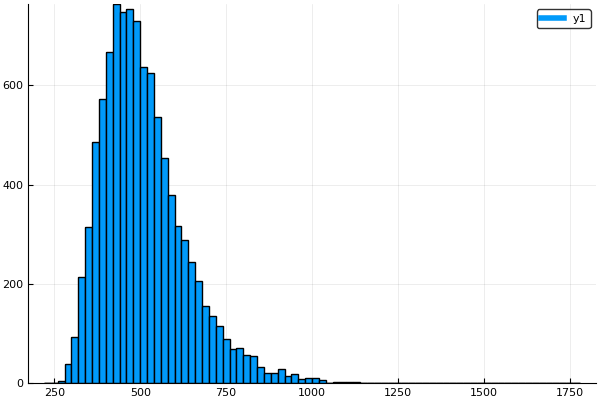

In [54]:
@show var(meancovertime)
@show std(meancovertime)
@show mean(meancovertime)
@show maximum(meancovertime)
@show minimum(meancovertime)
histogram(vec(meancovertime))

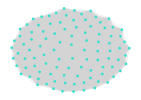

In [55]:
gplot(g)

In [56]:
exact_gmfpt = exactGMFPTlist(g);
@time begin 
    i = 1
    while !(1 - Pexact(i, exact_gmfpt) < 1e-10)
        i += 1
    end
    Tₘₐₓ = i
    @show Tₘₐₓ, 1 - Pexact(i, exact_gmfpt)
end

println()
@time begin
    exact_gmfpt = exactGMFPTlist(g);
    exact = quadgk(x-> 1 - Pexact(x, exact_gmfpt), 0, i)[1]
    print("thesis exact: ")
end
println()

@time begin
    degreelist = degree(g)
    estimation = quadgk(x-> 1 - Pest(x, degreelist), 0, i)[1]
    print("thesis estimate: ")
end




sleep(0.1)
display(MIME("text/markdown"), 
"""
\$\$
    \\tau^{\\text{ex}}_v = \\frac{N}{N-1} \\sum_{i=2}^{N} \\frac{1}{\\lambda_i} 
        \\left(2E \\mu_{iv}^2 - \\mu_{iv}\\sum_{n=1}^N k_n \\mu_{in}  \\right), ~~~
    \\tau^{\\text{es}}_v \\geq \\frac{N \\langle k \\rangle}{k_v} \\frac{1}{1 - \\langle k \\rangle^{-1}}
\$\$
    
    
\$\$
    \\langle T^{\\text{ex}} \\rangle \\simeq \\int_{0}^{\\infty} dT 
    \\left\\{1 - \\prod_{v=1}^{N} \\left\[1 - \\exp \\left\(- \\frac{T}{\\tau_v^{\\text{ex}}} \\right\) \\right\]  
\\right\\} 
\$\$

\$\$
    \\langle T^{\\text{es}} \\rangle \\geq \\int_{0}^{\\infty} dT 
    \\left\\{1 - \\prod_{v=1}^{N} 
        \\left\[1 - 
            \\exp \\left\(- Tk_v \\frac{1 - \\langle k \\rangle^{-1}}{N \\langle k \\rangle} \\right\) 
        \\right\]  
    \\right\\} 
\$\$    


|       type      |                        value                       |                                            error (%)                                           |
|:---------------:|:--------------------------------------------------:|:------------------------------------------------------------------------------------------:|
|   Thesis exact  | $(exact)                                           | $(100 * abs(exact - simulation_result)/exact)                                                    |
| Thesis estimate | $(estimation)                                      | $(100 * abs(estimation - simulation_result)/estimation)                                          |
|  My simulation  | $(simulation_result)                               |                                                                                            |                                                            |
""")

(Tₘₐₓ, 1 - Pexact(i, exact_gmfpt)) = (2736, 9.946488077616777e-11)
  0.034727 seconds (84.01 k allocations: 7.641 MiB)

thesis exact:   0.302694 seconds (454.31 k allocations: 39.546 MiB, 2.53% gc time)

thesis estimate:   0.278222 seconds (170.56 k allocations: 9.207 MiB)


$$
    \tau^{\text{ex}}_v = \frac{N}{N-1} \sum_{i=2}^{N} \frac{1}{\lambda_i} 
        \left(2E \mu_{iv}^2 - \mu_{iv}\sum_{n=1}^N k_n \mu_{in}  \right), ~~~
    \tau^{\text{es}}_v \geq \frac{N \langle k \rangle}{k_v} \frac{1}{1 - \langle k \rangle^{-1}}
$$
    
    
$$
    \langle T^{\text{ex}} \rangle \simeq \int_{0}^{\infty} dT 
    \left\{1 - \prod_{v=1}^{N} \left[1 - \exp \left(- \frac{T}{\tau_v^{\text{ex}}} \right) \right]  
\right\} 
$$

$$
    \langle T^{\text{es}} \rangle \geq \int_{0}^{\infty} dT 
    \left\{1 - \prod_{v=1}^{N} 
        \left[1 - 
            \exp \left(- Tk_v \frac{1 - \langle k \rangle^{-1}}{N \langle k \rangle} \right) 
        \right]  
    \right\} 
$$    


|       type      |                        value                       |                                            error (%)                                           |
|:---------------:|:--------------------------------------------------:|:------------------------------------------------------------------------------------------:|
|   Thesis exact  | 513.5503742364766                                           | 0.6913585141000574                                                    |
| Thesis estimate | 524.0309941077373                                      | 2.6775313417535407                                          |
|  My simulation  | 509.9999                               |                                                                                            |                                                            |


###  Erdős–Rény

In [57]:
nnodes = 100
nsample = 100
prob = 0.3
g =  erdos_renyi(nnodes, prob)
meancovertime = zeros(Float64, nnodes, nsample)
@showprogress 1 "Computing..." for i in 1:nnodes
    for j in 1:nsample
        meancovertime[i, j] = ct(g, i)
    end
end
simulation_result = mean(meancovertime)

Computing...100%|███████████████████████████████████████| Time: 0:00:26


559.3019

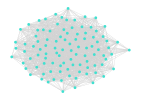

In [58]:
gplot(g)

In [59]:
exact_gmfpt = exactGMFPTlist(g);
@time begin 
    i = 1
    while !(1 - Pexact(i, exact_gmfpt) < 1e-10)
        i += 1
    end
    Tₘₐₓ = i
    @show Tₘₐₓ, 1 - Pexact(i, exact_gmfpt)
end

println()
@time begin
    exact_gmfpt = exactGMFPTlist(g);
    exact = quadgk(x-> 1 - Pexact(x, exact_gmfpt), 0, i)[1]
    print("thesis exact: ")
end
println()

@time begin
    degreelist = degree(g)
    estimation = quadgk(x-> 1 - Pest(x, degreelist), 0, i)[1]
    print("thesis estimate: ")
end


sleep(0.1)
display(MIME("text/markdown"), 
"""
\$\$
    \\tau^{\\text{ex}}_v = \\frac{N}{N-1} \\sum_{i=2}^{N} \\frac{1}{\\lambda_i} 
        \\left(2E \\mu_{iv}^2 - \\mu_{iv}\\sum_{n=1}^N k_n \\mu_{in}  \\right), ~~~
    \\tau^{\\text{es}}_v \\geq \\frac{N \\langle k \\rangle}{k_v} \\frac{1}{1 - \\langle k \\rangle^{-1}}
\$\$
    
    
\$\$
    \\langle T^{\\text{ex}} \\rangle \\simeq \\int_{0}^{\\infty} dT 
    \\left\\{1 - \\prod_{v=1}^{N} \\left\[1 - \\exp \\left\(- \\frac{T}{\\tau_v^{\\text{ex}}} \\right\) \\right\]  
\\right\\} 
\$\$

\$\$
    \\langle T^{\\text{es}} \\rangle \\geq \\int_{0}^{\\infty} dT 
    \\left\\{1 - \\prod_{v=1}^{N} 
        \\left\[1 - 
            \\exp \\left\(- Tk_v \\frac{1 - \\langle k \\rangle^{-1}}{N \\langle k \\rangle} \\right\) 
        \\right\]  
    \\right\\} 
\$\$    


|       type      |                        value                       |                                            error                                           |
|:---------------:|:--------------------------------------------------:|:------------------------------------------------------------------------------------------:|
|   Thesis exact  | $(quadgk(x-> 1 - Pexact(x, exact_gmfpt), 0, i)[1]) | $(abs(quadgk(x-> 1 - Pexact(x, exact_gmfpt), 0, i)[1] - simulation_result)/simulation_result) |
| Thesis estimate |   $(quadgk(x-> 1 - Pest(x, degreelist), 0, i)[1])  |   $(abs(quadgk(x-> 1 - Pest(x, degreelist), 0, i)[1] - simulation_result)/simulation_result)  |
|  My simulation  |                $(simulation_result)                |                                                                                            |                                                            |
""")

(Tₘₐₓ, 1 - Pexact(i, exact_gmfpt)) = (4046, 9.973744052871325e-11)
  0.066180 seconds (124.56 k allocations: 11.288 MiB, 4.90% gc time)

thesis exact:   0.310212 seconds (453.29 k allocations: 39.032 MiB, 3.66% gc time)

thesis estimate:   0.266456 seconds (170.56 k allocations: 9.207 MiB)


$$
    \tau^{\text{ex}}_v = \frac{N}{N-1} \sum_{i=2}^{N} \frac{1}{\lambda_i} 
        \left(2E \mu_{iv}^2 - \mu_{iv}\sum_{n=1}^N k_n \mu_{in}  \right), ~~~
    \tau^{\text{es}}_v \geq \frac{N \langle k \rangle}{k_v} \frac{1}{1 - \langle k \rangle^{-1}}
$$
    
    
$$
    \langle T^{\text{ex}} \rangle \simeq \int_{0}^{\infty} dT 
    \left\{1 - \prod_{v=1}^{N} \left[1 - \exp \left(- \frac{T}{\tau_v^{\text{ex}}} \right) \right]  
\right\} 
$$

$$
    \langle T^{\text{es}} \rangle \geq \int_{0}^{\infty} dT 
    \left\{1 - \prod_{v=1}^{N} 
        \left[1 - 
            \exp \left(- Tk_v \frac{1 - \langle k \rangle^{-1}}{N \langle k \rangle} \right) 
        \right]  
    \right\} 
$$    


|       type      |                        value                       |                                            error                                           |
|:---------------:|:--------------------------------------------------:|:------------------------------------------------------------------------------------------:|
|   Thesis exact  | 561.6065128414581 | 0.004120516739632098 |
| Thesis estimate |   571.9770176296327  |   0.02266238972124466  |
|  My simulation  |                559.3019                |                                                                                            |                                                            |


### Barabási–Albert model

In [60]:
n = 150
n₀ = 10
k = 10
g = barabasi_albert(n, n₀, k)
meancovertime = zeros(Float64, nnodes, nsample)
@showprogress 1 "Computing..." for i in 1:nnodes
    for j in 1:nsample
        meancovertime[i, j] = ct(g, i)
    end
end
simulation_result = mean(meancovertime)

Computing...100%|███████████████████████████████████████| Time: 0:01:24


1293.1069

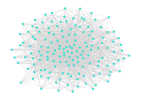

In [61]:
gplot(g)

In [62]:
exact_gmfpt = exactGMFPTlist(g);
@time begin 
    i = 1
    while !(1 - Pexact(i, exact_gmfpt) < 1e-10)
        i += 1
    end
    Tₘₐₓ = i
    @show Tₘₐₓ, 1 - Pexact(i, exact_gmfpt)
end

println()
@time begin
    exact_gmfpt = exactGMFPTlist(g);
    exact = quadgk(x-> 1 - Pexact(x, exact_gmfpt), 0, i)[1]
    print("thesis exact: ")
end
println()

@time begin
    degreelist = degree(g)
    estimation = quadgk(x-> 1 - Pest(x, degreelist), 0, i)[1]
    print("thesis estimate: ")
end


sleep(0.1)
display(MIME("text/markdown"), 
"""
\$\$
    \\tau^{\\text{ex}}_v = \\frac{N}{N-1} \\sum_{i=2}^{N} \\frac{1}{\\lambda_i} 
        \\left(2E \\mu_{iv}^2 - \\mu_{iv}\\sum_{n=1}^N k_n \\mu_{in}  \\right), ~~~
    \\tau^{\\text{es}}_v \\geq \\frac{N \\langle k \\rangle}{k_v} \\frac{1}{1 - \\langle k \\rangle^{-1}}
\$\$
    
    
\$\$
    \\langle T^{\\text{ex}} \\rangle \\simeq \\int_{0}^{\\infty} dT 
    \\left\\{1 - \\prod_{v=1}^{N} \\left\[1 - \\exp \\left\(- \\frac{T}{\\tau_v^{\\text{ex}}} \\right\) \\right\]  
\\right\\} 
\$\$

\$\$
    \\langle T^{\\text{es}} \\rangle \\geq \\int_{0}^{\\infty} dT 
    \\left\\{1 - \\prod_{v=1}^{N} 
        \\left\[1 - 
            \\exp \\left\(- Tk_v \\frac{1 - \\langle k \\rangle^{-1}}{N \\langle k \\rangle} \\right\) 
        \\right\]  
    \\right\\} 
\$\$    


|       type      |                        value                       |                                            error                                           |
|:---------------:|:--------------------------------------------------:|:------------------------------------------------------------------------------------------:|
|   Thesis exact  | $(quadgk(x-> 1 - Pexact(x, exact_gmfpt), 0, i)[1]) | $(abs(quadgk(x-> 1 - Pexact(x, exact_gmfpt), 0, i)[1] - simulation_result)/simulation_result) |
| Thesis estimate |   $(quadgk(x-> 1 - Pest(x, degreelist), 0, i)[1])  |   $(abs(quadgk(x-> 1 - Pest(x, degreelist), 0, i)[1] - simulation_result)/simulation_result)  |
|  My simulation  |                $(simulation_result)                |                                                                                            |                                                            |
""")

(Tₘₐₓ, 1 - Pexact(i, exact_gmfpt)) = (7634, 9.980816173538187e-11)
  0.099036 seconds (235.78 k allocations: 28.064 MiB, 3.46% gc time)

thesis exact:   0.321758 seconds (802.07 k allocations: 106.100 MiB, 4.99% gc time)

thesis estimate:   0.273518 seconds (170.55 k allocations: 9.507 MiB)


$$
    \tau^{\text{ex}}_v = \frac{N}{N-1} \sum_{i=2}^{N} \frac{1}{\lambda_i} 
        \left(2E \mu_{iv}^2 - \mu_{iv}\sum_{n=1}^N k_n \mu_{in}  \right), ~~~
    \tau^{\text{es}}_v \geq \frac{N \langle k \rangle}{k_v} \frac{1}{1 - \langle k \rangle^{-1}}
$$
    
    
$$
    \langle T^{\text{ex}} \rangle \simeq \int_{0}^{\infty} dT 
    \left\{1 - \prod_{v=1}^{N} \left[1 - \exp \left(- \frac{T}{\tau_v^{\text{ex}}} \right) \right]  
\right\} 
$$

$$
    \langle T^{\text{es}} \rangle \geq \int_{0}^{\infty} dT 
    \left\{1 - \prod_{v=1}^{N} 
        \left[1 - 
            \exp \left(- Tk_v \frac{1 - \langle k \rangle^{-1}}{N \langle k \rangle} \right) 
        \right]  
    \right\} 
$$    


|       type      |                        value                       |                                            error                                           |
|:---------------:|:--------------------------------------------------:|:------------------------------------------------------------------------------------------:|
|   Thesis exact  | 1291.6109424238964 | 0.0011568707707797338 |
| Thesis estimate |   1305.6153580690673  |   0.009673181752465534  |
|  My simulation  |                1293.1069                |                                                                                            |                                                            |


### k - regular graph

In [63]:
n = 100
k = 5
g = random_regular_graph(n, k)
meancovertime = zeros(Float64, nnodes, nsample)
@showprogress 1 "Computing..." for i in 1:nnodes
    for j in 1:nsample
        meancovertime[i, j] = ct(g, i)
    end
end
simulation_result = mean(meancovertime)

Computing...100%|███████████████████████████████████████| Time: 0:00:32


659.3047

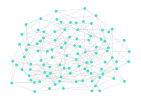

In [64]:
gplot(g)

In [65]:
exact_gmfpt = exactGMFPTlist(g);
@time begin 
    i = 1
    while !(1 - Pexact(i, exact_gmfpt) < 1e-10)
        i += 1
    end
    Tₘₐₓ = i
    @show Tₘₐₓ, 1 - Pexact(i, exact_gmfpt)
end

println()
@time begin
    exact_gmfpt = exactGMFPTlist(g);
    exact = quadgk(x-> 1 - Pexact(x, exact_gmfpt), 0, i)[1]
    print("thesis exact: ")
end
println()

@time begin
    degreelist = degree(g)
    estimation = quadgk(x-> 1 - Pest(x, degreelist), 0, i)[1]
    print("thesis estimate: ")
end


sleep(0.1)
display(MIME("text/markdown"), 
"""
\$\$
    \\tau^{\\text{ex}}_v = \\frac{N}{N-1} \\sum_{i=2}^{N} \\frac{1}{\\lambda_i} 
        \\left(2E \\mu_{iv}^2 - \\mu_{iv}\\sum_{n=1}^N k_n \\mu_{in}  \\right), ~~~
    \\tau^{\\text{es}}_v \\geq \\frac{N \\langle k \\rangle}{k_v} \\frac{1}{1 - \\langle k \\rangle^{-1}}
\$\$
    
    
\$\$
    \\langle T^{\\text{ex}} \\rangle \\simeq \\int_{0}^{\\infty} dT 
    \\left\\{1 - \\prod_{v=1}^{N} \\left\[1 - \\exp \\left\(- \\frac{T}{\\tau_v^{\\text{ex}}} \\right\) \\right\]  
\\right\\} 
\$\$

\$\$
    \\langle T^{\\text{es}} \\rangle \\geq \\int_{0}^{\\infty} dT 
    \\left\\{1 - \\prod_{v=1}^{N} 
        \\left\[1 - 
            \\exp \\left\(- Tk_v \\frac{1 - \\langle k \\rangle^{-1}}{N \\langle k \\rangle} \\right\) 
        \\right\]  
    \\right\\} 
\$\$    


|       type      |                        value                       |                                            error                                           |
|:---------------:|:--------------------------------------------------:|:------------------------------------------------------------------------------------------:|
|   Thesis exact  | $(quadgk(x-> 1 - Pexact(x, exact_gmfpt), 0, i)[1]) | $(abs(quadgk(x-> 1 - Pexact(x, exact_gmfpt), 0, i)[1] - simulation_result)/simulation_result) |
| Thesis estimate |   $(quadgk(x-> 1 - Pest(x, degreelist), 0, i)[1])  |   $(abs(quadgk(x-> 1 - Pest(x, degreelist), 0, i)[1] - simulation_result)/simulation_result)  |
|  My simulation  |                $(simulation_result)                |                                                                                            |                                                            |
""")

(Tₘₐₓ, 1 - Pexact(i, exact_gmfpt)) = (3590, 9.950540391656659e-11)
  0.051289 seconds (110.42 k allocations: 10.014 MiB)

thesis exact:   0.306300 seconds (444.37 k allocations: 38.820 MiB, 2.40% gc time)

thesis estimate:   0.270051 seconds (171.77 k allocations: 9.366 MiB)


$$
    \tau^{\text{ex}}_v = \frac{N}{N-1} \sum_{i=2}^{N} \frac{1}{\lambda_i} 
        \left(2E \mu_{iv}^2 - \mu_{iv}\sum_{n=1}^N k_n \mu_{in}  \right), ~~~
    \tau^{\text{es}}_v \geq \frac{N \langle k \rangle}{k_v} \frac{1}{1 - \langle k \rangle^{-1}}
$$
    
    
$$
    \langle T^{\text{ex}} \rangle \simeq \int_{0}^{\infty} dT 
    \left\{1 - \prod_{v=1}^{N} \left[1 - \exp \left(- \frac{T}{\tau_v^{\text{ex}}} \right) \right]  
\right\} 
$$

$$
    \langle T^{\text{es}} \rangle \geq \int_{0}^{\infty} dT 
    \left\{1 - \prod_{v=1}^{N} 
        \left[1 - 
            \exp \left(- Tk_v \frac{1 - \langle k \rangle^{-1}}{N \langle k \rangle} \right) 
        \right]  
    \right\} 
$$    


|       type      |                        value                       |                                            error                                           |
|:---------------:|:--------------------------------------------------:|:------------------------------------------------------------------------------------------:|
|   Thesis exact  | 671.8682841041048 | 0.019055808496594568 |
| Thesis estimate |   648.4221897007466  |   0.01650604083249134  |
|  My simulation  |                659.3047                |                                                                                            |                                                            |


### Watts–Strogatz model

In [66]:
n = 100
k = 5
β = 0.5
g = watts_strogatz(n, k, β)
meancovertime = zeros(Float64, nnodes, nsample)
@showprogress 1 "Computing..." for i in 1:nnodes
    for j in 1:nsample
        meancovertime[i, j] = ct(g, i)
    end
end
simulation_result = mean(meancovertime)

Computing...100%|███████████████████████████████████████| Time: 0:00:49


986.2727

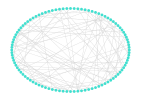

In [67]:
gplot(g, layout=circular_layout)

In [68]:
exact_gmfpt = exactGMFPTlist(g);
@time begin 
    i = 1
    while !(1 - Pexact(i, exact_gmfpt) < 1e-10)
        i += 1
    end
    Tₘₐₓ = i
    @show Tₘₐₓ, 1 - Pexact(i, exact_gmfpt)
end

println()
@time begin
    exact_gmfpt = exactGMFPTlist(g);
    exact = quadgk(x-> 1 - Pexact(x, exact_gmfpt), 0, i)[1]
    print("thesis exact: ")
end
println()

@time begin
    degreelist = degree(g)
    estimation = quadgk(x-> 1 - Pest(x, degreelist), 0, i)[1]
    print("thesis estimate: ")
end


sleep(0.1)
display(MIME("text/markdown"), 
"""
\$\$
    \\tau^{\\text{ex}}_v = \\frac{N}{N-1} \\sum_{i=2}^{N} \\frac{1}{\\lambda_i} 
        \\left(2E \\mu_{iv}^2 - \\mu_{iv}\\sum_{n=1}^N k_n \\mu_{in}  \\right), ~~~
    \\tau^{\\text{es}}_v \\geq \\frac{N \\langle k \\rangle}{k_v} \\frac{1}{1 - \\langle k \\rangle^{-1}}
\$\$
    
    
\$\$
    \\langle T^{\\text{ex}} \\rangle \\simeq \\int_{0}^{\\infty} dT 
    \\left\\{1 - \\prod_{v=1}^{N} \\left\[1 - \\exp \\left\(- \\frac{T}{\\tau_v^{\\text{ex}}} \\right\) \\right\]  
\\right\\} 
\$\$

\$\$
    \\langle T^{\\text{es}} \\rangle \\geq \\int_{0}^{\\infty} dT 
    \\left\\{1 - \\prod_{v=1}^{N} 
        \\left\[1 - 
            \\exp \\left\(- Tk_v \\frac{1 - \\langle k \\rangle^{-1}}{N \\langle k \\rangle} \\right\) 
        \\right\]  
    \\right\\} 
\$\$    


|       type      |                        value                       |                                            error                                           |
|:---------------:|:--------------------------------------------------:|:------------------------------------------------------------------------------------------:|
|   Thesis exact  | $(quadgk(x-> 1 - Pexact(x, exact_gmfpt), 0, i)[1]) | $(abs(quadgk(x-> 1 - Pexact(x, exact_gmfpt), 0, i)[1] - simulation_result)/simulation_result) |
| Thesis estimate |   $(quadgk(x-> 1 - Pest(x, degreelist), 0, i)[1])  |   $(abs(quadgk(x-> 1 - Pest(x, degreelist), 0, i)[1] - simulation_result)/simulation_result)  |
|  My simulation  |                $(simulation_result)                |                                                                                            |                                                            |
""")

(Tₘₐₓ, 1 - Pexact(i, exact_gmfpt)) = (7513, 9.968559311346326e-11)
  0.090414 seconds (232.03 k allocations: 20.969 MiB, 3.54% gc time)

thesis exact:   0.293992 seconds (443.36 k allocations: 38.730 MiB, 2.30% gc time)

thesis estimate:   0.271538 seconds (171.77 k allocations: 9.369 MiB)


$$
    \tau^{\text{ex}}_v = \frac{N}{N-1} \sum_{i=2}^{N} \frac{1}{\lambda_i} 
        \left(2E \mu_{iv}^2 - \mu_{iv}\sum_{n=1}^N k_n \mu_{in}  \right), ~~~
    \tau^{\text{es}}_v \geq \frac{N \langle k \rangle}{k_v} \frac{1}{1 - \langle k \rangle^{-1}}
$$
    
    
$$
    \langle T^{\text{ex}} \rangle \simeq \int_{0}^{\infty} dT 
    \left\{1 - \prod_{v=1}^{N} \left[1 - \exp \left(- \frac{T}{\tau_v^{\text{ex}}} \right) \right]  
\right\} 
$$

$$
    \langle T^{\text{es}} \rangle \geq \int_{0}^{\infty} dT 
    \left\{1 - \prod_{v=1}^{N} 
        \left[1 - 
            \exp \left(- Tk_v \frac{1 - \langle k \rangle^{-1}}{N \langle k \rangle} \right) 
        \right]  
    \right\} 
$$    


|       type      |                        value                       |                                            error                                           |
|:---------------:|:--------------------------------------------------:|:------------------------------------------------------------------------------------------:|
|   Thesis exact  | 999.558429344271 | 0.013470644928396554 |
| Thesis estimate |   931.6906402835275  |   0.05534175255633912  |
|  My simulation  |                986.2727                |                                                                                            |                                                            |


## Animation

In [69]:
using Compose, Colors

In [70]:
G = CompleGraph(10)
# nodes membership
membership = ones(Int8, nv(G))
nodecolor = [colorant"lightseagreen", colorant"orange"]
# membership color
nodefillc = nodecolor[membership]
ggplot(G, nodefillc=nodefillc, nodelabel=1:nv(G))

LoadError: [91mUndefVarError: CompleGraph not defined[39m

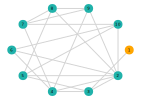

In [71]:
track = ctvisit(G,1)[1]
i = 1
membership = ones(Int8, nv(G))
membership[track[i]] = 2
nodecolor = [colorant"lightseagreen", colorant"orange"]
# membership color
nodefillc = nodecolor[membership]
ggplot(G, nodefillc=nodefillc, nodelabel=1:nv(G))

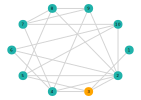

In [72]:
i = 2

membership = ones(Int8, nv(G))
membership[track[i]] = 2
nodecolor = [colorant"lightseagreen", colorant"orange"]
# membership color
nodefillc = nodecolor[membership]
ggplot(G, nodefillc=nodefillc, nodelabel=1:nv(G))

### First passage time

In [73]:
# animation
s, f = 1, 1
nvertices, nedges = 10, 20
# G = Graph(nvertices, nedges)
G = CompleteGraph(nvertices)
track = fptvisit(G, s, f)[1]

8-element Array{Int64,1}:
 1
 5
 2
 8
 7
 5
 8
 1

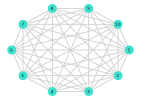

In [74]:
ggplot(G, nodelabel=1:nvertices)

In [75]:
dir = string(now())
run(`mkdir -p pic/$(dir)`)
for (i, node) in enumerate(track)
    membership = ones(Int8, nv(G))
    membership[node] = 2
    nodecolor = [colorant"lightseagreen", colorant"orange"]
    # membership color
    nodefillc = nodecolor[membership]
    draw(PNG(@sprintf("pic/%s/%03d.png", dir, i), 8inch, 8inch), 
        ggplot(G, nodefillc=nodefillc, nodelabel=1:nv(G)))
end
run(`ffmpeg -y -framerate 1.5 -i pic/$(dir)/%03d.png -vcodec libx264 -pix_fmt yuv420p -r 60 pic/$(dir)/out.mp4`)

ffmpeg version 3.4 Copyright (c) 2000-2017 the FFmpeg developers
  built with gcc 7.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-avisynth --enable-avresample --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libass --enable-libbluray --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxcb --enable-libxvid --enable-shared --enable-version3
  libavutil      55. 78.100 / 55. 78.100
  libavcodec     57.107.100 / 57.107.100
  libavformat    57. 83.100 / 57. 83.100
  libavdevice    57. 10.100 / 57. 10.100
  libavfilter     6

### Cover time

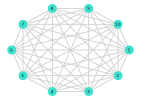

In [76]:
s = 1
nvertices, nedges = 10, 20
# g = Graph(nvertices, nedges)
g = CompleteGraph(nvertices)
track = ctvisit(g, s)[1]
ggplot(g, nodelabel=1:nv(g))

In [77]:
# cover time animation

dir = string(now())
run(`mkdir -p pic/$(dir)`)
for (i, node) in enumerate(track)
    membership = ones(Int8, nv(g))
    membership[node] = 2
    nodecolor = [colorant"lightseagreen", colorant"orange"]
    # membership color
    nodefillc = nodecolor[membership]
    draw(PNG(@sprintf("pic/%s/%03d.png", dir, i), 8inch, 8inch), 
        ggplot(g, nodelabelsize=30, nodefillc=nodefillc, nodelabel=1:nvertices))
end
run(`ffmpeg -y -framerate 1 -i pic/$(dir)/%03d.png -vcodec libx264 -pix_fmt yuv420p -r 60 pic/$(dir)/out.mp4`)

ffmpeg version 3.4 Copyright (c) 2000-2017 the FFmpeg developers
  built with gcc 7.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-avisynth --enable-avresample --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libass --enable-libbluray --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxcb --enable-libxvid --enable-shared --enable-version3
  libavutil      55. 78.100 / 55. 78.100
  libavcodec     57.107.100 / 57.107.100
  libavformat    57. 83.100 / 57. 83.100
  libavdevice    57. 10.100 / 57. 10.100
  libavfilter     6